In [2]:
import json
import pandas as pd


In [3]:
# Load data
churn_df = pd.read_csv('reports/code_churn.csv')
lizard_df = pd.read_csv('reports/lizard.csv')
cpd_df = pd.read_csv('reports/cpd_results.csv')
maintainability_df = pd.read_csv('reports/maintainability_index.csv')
with open("reports/halstead.json","r") as f:
    halstead_data = json.load(f)
with open("reports/maintainability_index.csv","r") as f:
    maintainability_metrics = pd
with open("reports/mccabe.json","r") as f:
    mccabe_data = json.load(f)

In [4]:
top_duplicated_files = cpd_df["path"].value_counts().head(10)

# Identify files with the highest churn rate (by commits)
top_churn_files = churn_df.sort_values(by="commits", ascending=False)[['file','commits']].head(10)
#
# # Identify files with the highest NLOC (longest files)
# top_nloc_files = lizard_df.sort_values(by="length", ascending=False).head(10)
#
# print("top duplicated files: ",top_duplicated_files )
# print("top churn files: ",top_churn_files )
# print("top nloc files: ",top_nloc_files )
top_churn_files


,file,commits
593,src/prefect/engine.py,485
476,src/prefect/client.py,410
628,src/prefect/flows.py,321
1031,src/prefect/settings.py,313
1079,src/prefect/tasks.py,274
440,src/prefect/cli/deployment.py,264
557,src/prefect/deployments.py,258
786,src/prefect/orion/schemas/core.py,202
543,src/prefect/context.py,178
700,src/prefect/orion/api/server.py,172


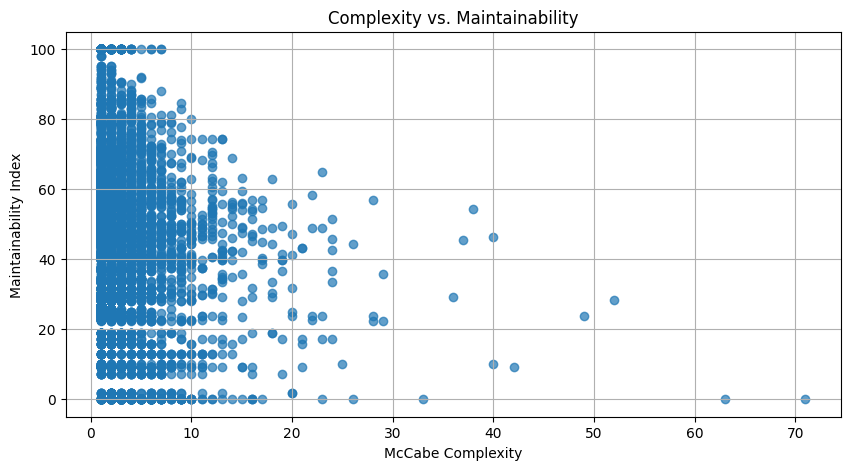

In [5]:
import matplotlib.pyplot as plt

# Extract maintainability scores into a DataFrame
maintainability_df.columns = ["file", "maintainability_index", "rank"]

# Extract McCabe complexity scores into a DataFrame
mccabe_list = []
for file, functions in mccabe_data.items():
    for func in functions:
        mccabe_list.append({"file": file, "function": func["name"], "complexity": func["complexity"]})

mccabe_df = pd.DataFrame(mccabe_list)

# Merge maintainability and McCabe complexity data
merged_df = maintainability_df.merge(mccabe_df, on="file", how="left")

# Plot maintainability index vs. complexity
plt.figure(figsize=(10, 5))
plt.scatter(merged_df["complexity"], merged_df["maintainability_index"], alpha=0.7)
plt.xlabel("McCabe Complexity")
plt.ylabel("Maintainability Index")
plt.title("Complexity vs. Maintainability")
plt.grid(True)
plt.show()

# Display merged dataset for further insights
